In [2]:
import os
import cv2
import supervision as sv
from tqdm.notebook import tqdm

HOME = os.getcwd()
print(HOME)

VIDEO_DIR_PATH = f"{HOME}/video"
IMAGE_DIR_PATH = f"{HOME}/images"
FRAME_STRIDE = 120


/Users/mac1/Desktop


In [3]:
video_paths = sv.list_files_with_extensions(
    directory=VIDEO_DIR_PATH,
    extensions=["mov", "mp4", "webM","3gp","TS"])

TEST_VIDEO_PATHS, TRAIN_VIDEO_PATHS = video_paths[:0], video_paths[0:]


In [4]:
for video_path in tqdm(TRAIN_VIDEO_PATHS):
    try:
        video_name = video_path.stem
        image_name_pattern = video_name + "-{:05d}.png"
        
        with sv.ImageSink(target_dir_path=IMAGE_DIR_PATH, image_name_pattern=image_name_pattern) as sink:
            for image in sv.get_video_frames_generator(source_path=str(video_path), stride=FRAME_STRIDE):
                sink.save_image(image=image)
    except Exception as e:
        print(f"Error processing video {video_path}: {e}")


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpeg"])

print('image count:', len(image_paths))


image count: 48


In [6]:
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)


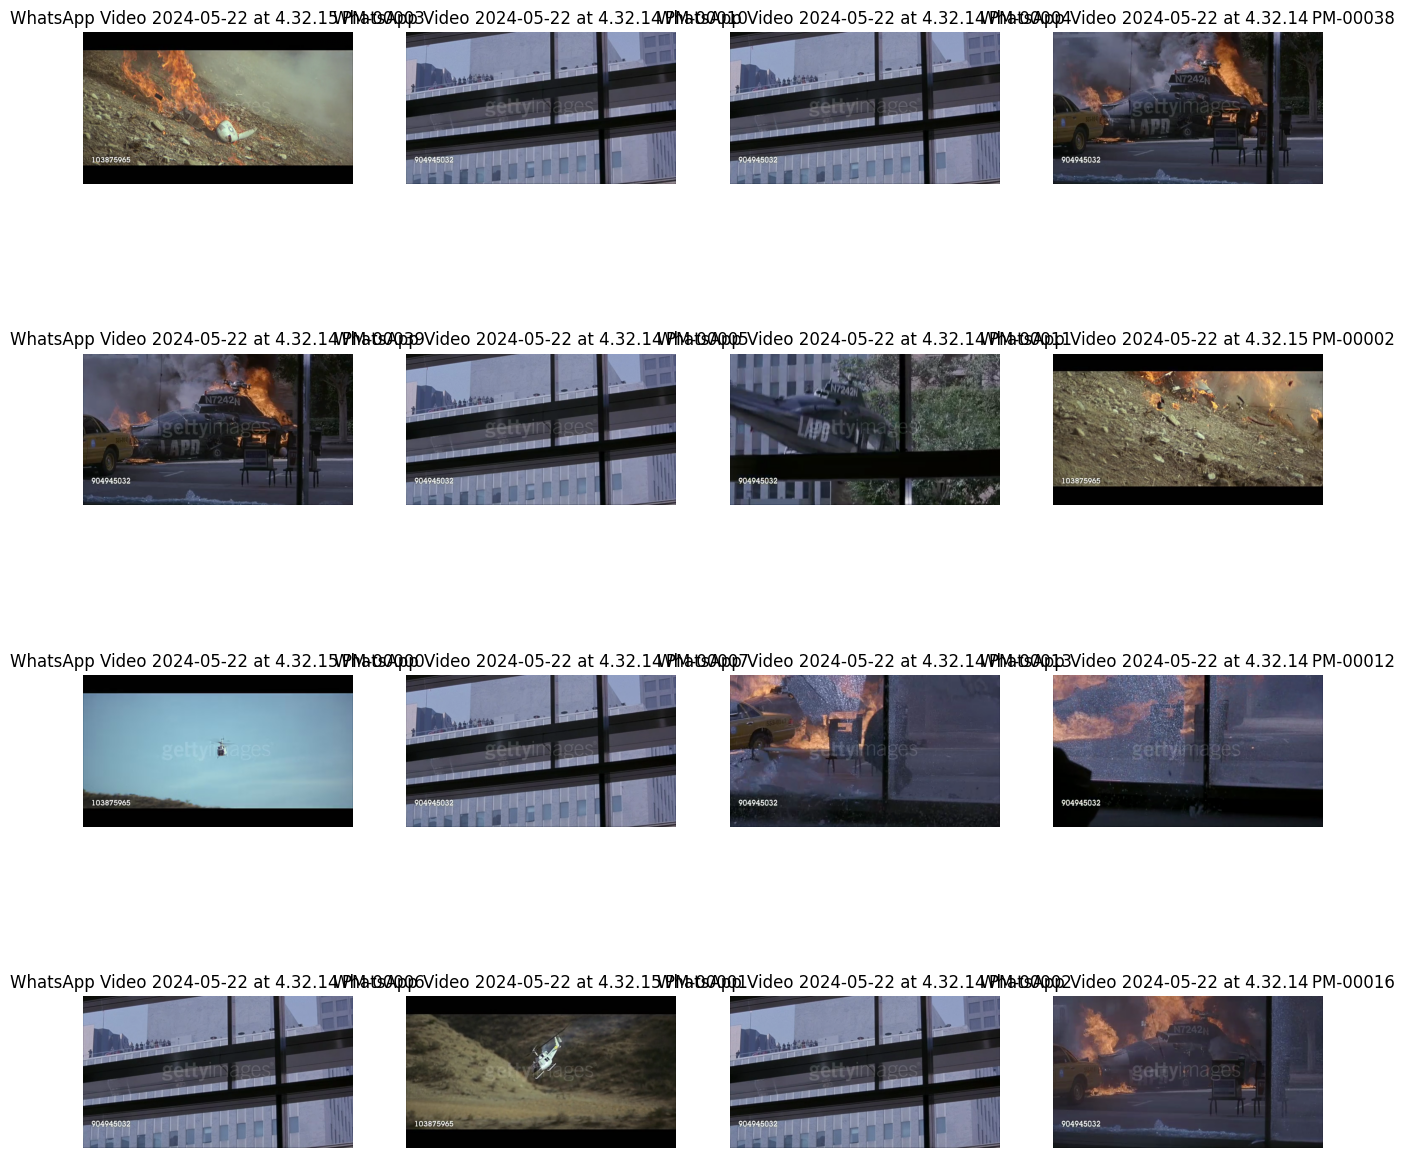

In [7]:
titles = [image_path.stem for image_path in image_paths[:SAMPLE_SIZE]]
images = [cv2.imread(str(image_path)) for image_path in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)
